In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
df=pd.read_csv('horse.csv')
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [3]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [4]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [5]:
df.nlargest(50,['hospital_number'])

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
261,no,young,5305629,38.6,88.0,28.0,NaN,NaN,NaN,NaN,...,35.0,5.9,NaN,NaN,lived,no,0,0,0,no
286,no,young,5305129,39.5,84.0,30.0,NaN,NaN,NaN,less_3_sec,...,28.0,5.0,NaN,NaN,lived,no,0,0,0,no
16,yes,young,5301219,NaN,128.0,36.0,cool,reduced,pale_cyanotic,more_3_sec,...,53.0,7.8,serosanguious,4.7,died,no,1400,0,0,yes
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes
188,yes,adult,5299603,38.3,60.0,16.0,cool,normal,normal_pink,less_3_sec,...,30.0,6.0,clear,3.0,lived,yes,31110,0,0,no
72,yes,adult,5299253,37.7,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,died,yes,2113,0,0,no
109,yes,young,5297379,38.4,84.0,40.0,cool,reduced,bright_pink,less_3_sec,...,36.0,6.6,cloudy,2.8,died,yes,2205,0,0,yes
274,yes,young,5297159,38.8,150.0,50.0,normal,reduced,dark_cyanotic,more_3_sec,...,50.0,6.2,NaN,NaN,died,yes,4207,0,0,no
254,yes,young,5294539,38.8,184.0,84.0,normal,NaN,normal_pink,less_3_sec,...,33.0,3.3,NaN,NaN,died,yes,7111,0,0,no
211,yes,young,5294369,38.9,120.0,30.0,normal,reduced,bright_pink,more_3_sec,...,47.0,6.3,clear,NaN,lived,no,2124,0,0,no


In [6]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [7]:
features=df.drop(['outcome'], axis=1)
target=df[['outcome']]
print(features.shape)
print(target.shape)

(299, 27)
(299, 1)


In [8]:
fea_transformed=pd.get_dummies(features)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(fea_transformed, target, random_state=10)

In [10]:
print(X_train.shape,' ',X_test.shape,' ',y_train.shape,' ',y_test.shape,' ')

(224, 67)   (75, 67)   (224, 1)   (75, 1)  


In [11]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [12]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.fit_transform(X_test)

In [13]:
dt_model=DecisionTreeClassifier()

In [14]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
pred=dt_model.predict(X_test)

In [16]:
accuracy_score(y_test,pred)

0.72

In [17]:
print(confusion_matrix(y_test,pred))

[[10  1  4]
 [ 3  2  6]
 [ 4  3 42]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        died       0.59      0.67      0.62        15
  euthanized       0.33      0.18      0.24        11
       lived       0.81      0.86      0.83        49

    accuracy                           0.72        75
   macro avg       0.58      0.57      0.56        75
weighted avg       0.69      0.72      0.70        75



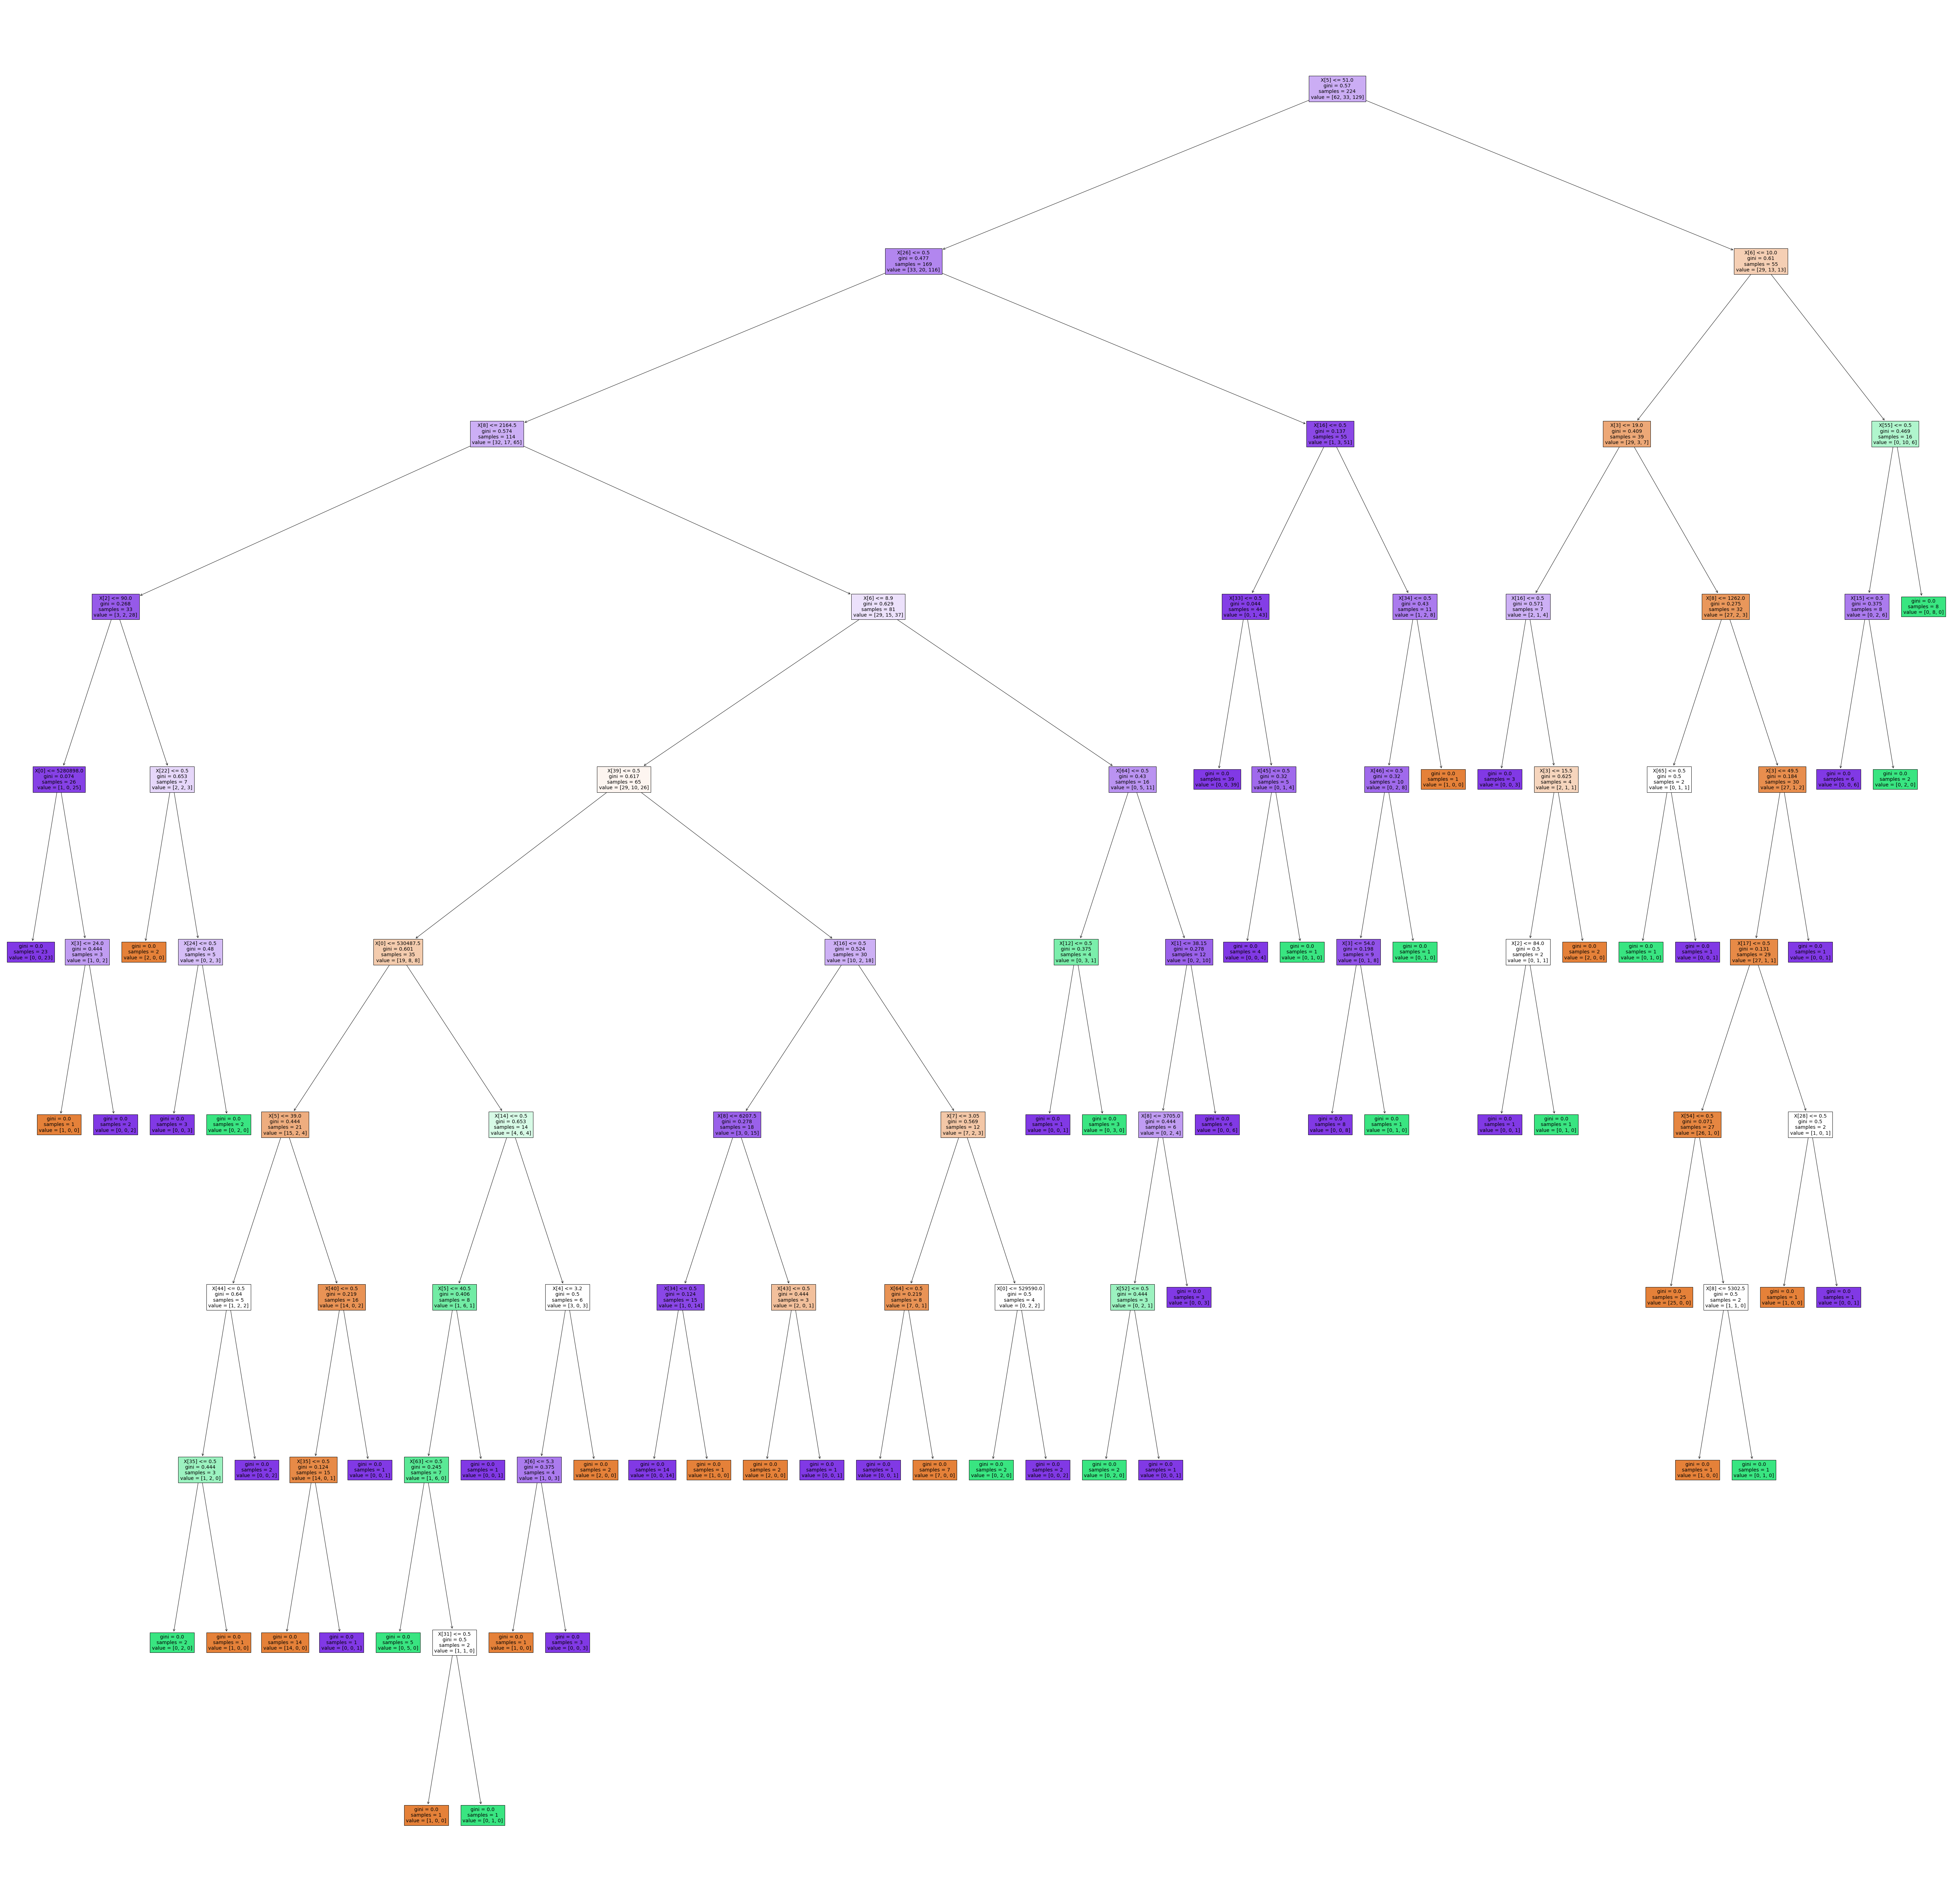

In [19]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(dt_model,
                   filled=True)

In [20]:
params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_split' : [2, 3, 4],
          'min_samples_leaf' : [1, 2, 3],
          'max_leaf_nodes' : [4, 5, 6]
         }

grid_search = GridSearchCV(dt_model, param_grid= params)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [22]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [23]:
best_preds = grid_search.predict(X_test)

In [24]:
accuracy_score(y_test, best_preds)

0.7066666666666667

In [25]:

print(classification_report(y_test, best_preds))

              precision    recall  f1-score   support

        died       0.58      0.47      0.52        15
  euthanized       1.00      0.09      0.17        11
       lived       0.73      0.92      0.81        49

    accuracy                           0.71        75
   macro avg       0.77      0.49      0.50        75
weighted avg       0.74      0.71      0.66        75



In [26]:
algo = {'LR':LogisticRegression(),
        'DT':DecisionTreeClassifier()}
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print(v)
    print(model.score(X_test, y_test))

LogisticRegression()
0.6266666666666667
DecisionTreeClassifier()
0.6933333333333334


In [27]:
my_model = LogisticRegression()

In [28]:
my_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
preds = my_model.predict(X_test)

In [30]:
print(accuracy_score(y_test, preds))

0.6266666666666667


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=10)

In [33]:
pca.fit(X_train)

PCA(n_components=10)

In [34]:
pca.explained_variance_ratio_

array([9.99988140e-01, 1.17427218e-05, 1.17043994e-07, 3.00075054e-10,
       2.30214663e-10, 8.04132079e-11, 2.94012747e-11, 7.32839801e-13,
       5.87130676e-13, 3.42339290e-13])

In [35]:
pca.explained_variance_ratio_.shape

(10,)

In [36]:
np.sum(pca.explained_variance_ratio_)

0.9999999999974467

In [37]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [38]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9
0,-617392.134690,-3578.702556,-81.352322,-19.276712,-16.697655,6.851636,3.193344,0.037876,4.754296,0.373724
1,-618010.993008,-467.483777,-85.906637,-20.840743,-12.780753,-2.377145,6.530095,-0.495712,0.070203,-1.853696
2,-618881.958352,-373.159598,-86.038813,-9.168156,-15.228325,3.232167,-4.970362,0.255355,6.956074,2.600182
3,-616377.355280,-1455.076063,-84.431024,-19.704361,-14.296676,11.136860,-5.230360,-0.772008,-0.463887,-0.777839
4,-611523.325239,-1374.888444,-83.580899,71.869716,33.251972,2.418954,-1.028820,-0.318596,-0.181223,0.226763
...,...,...,...,...,...,...,...,...,...,...
219,-612887.325997,-1375.405688,-83.640243,1.009814,51.946643,-1.027724,6.652937,0.162457,-0.013416,1.337436
220,-616454.958512,-374.052422,-85.973081,-5.615591,-14.554103,-2.274966,-1.317413,-0.626633,-0.301307,0.553518
221,-616581.957520,-371.994741,-85.924374,31.029408,-20.385045,11.949519,-6.077227,1.302765,-1.150522,0.570902
222,-618354.325365,-1373.337917,-84.610797,-14.099279,-14.541086,46.545914,2.706288,-0.950306,-0.272274,0.686671


In [39]:
X_train_transformed.shape, X_test_transformed.shape

((224, 10), (75, 10))

In [40]:
pca.inverse_transform(X_train_transformed).shape

(224, 67)

In [41]:
my_model.fit(X_train_transformed,y_train)

LogisticRegression()

In [42]:
preds = my_model.predict(X_test_transformed)

In [43]:
print(accuracy_score(y_test, preds))

0.4666666666666667


In [45]:
df.corr()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
hospital_number,1.000000,0.144118,0.379607,0.273350,-0.005577,-0.093508,-0.228843,-0.044184,0.145397,-0.050433,-0.020950
rectal_temp,0.144118,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,0.062639,-0.062876,0.029336
pulse,0.379607,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.079332,-0.001899,0.101412
respiratory_rate,0.273350,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.180250,-0.020601,0.144773
nasogastric_reflux_ph,-0.005577,0.228306,0.005796,0.127164,1.000000,-0.131044,-0.717363,0.539505,0.089207,NaN,NaN
packed_cell_volume,-0.093508,0.065101,0.405660,0.086394,-0.131044,1.000000,-0.053075,0.152736,-0.068743,-0.077727,-0.066180
total_protein,-0.228843,-0.060817,-0.086533,-0.090743,-0.717363,-0.053075,1.000000,-0.517338,-0.181468,0.223892,0.066856
abdomo_protein,-0.044184,0.009343,0.020937,-0.074056,0.539505,0.152736,-0.517338,1.000000,-0.032938,-0.153246,-0.104158
lesion_1,0.145397,0.062639,0.079332,0.180250,0.089207,-0.068743,-0.181468,-0.032938,1.000000,0.005966,0.005850
lesion_2,-0.050433,-0.062876,-0.001899,-0.020601,NaN,-0.077727,0.223892,-0.153246,0.005966,1.000000,0.269374


In [49]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [50]:
df2=df.copy()

In [51]:
df2.loc[df['outcome']=='died','outcome']=0
df2.loc[df['outcome']=='euthanized','outcome']=1
df2.loc[df['outcome']=='lived','outcome']=2

In [53]:
df2

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,1,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,1,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,0,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,2,yes,2208,0,0,yes


In [52]:
df2.corr()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
hospital_number,1.000000,0.144118,0.379607,0.273350,-0.005577,-0.093508,-0.228843,-0.044184,0.145397,-0.050433,-0.020950
rectal_temp,0.144118,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,0.062639,-0.062876,0.029336
pulse,0.379607,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.079332,-0.001899,0.101412
respiratory_rate,0.273350,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.180250,-0.020601,0.144773
nasogastric_reflux_ph,-0.005577,0.228306,0.005796,0.127164,1.000000,-0.131044,-0.717363,0.539505,0.089207,NaN,NaN
packed_cell_volume,-0.093508,0.065101,0.405660,0.086394,-0.131044,1.000000,-0.053075,0.152736,-0.068743,-0.077727,-0.066180
total_protein,-0.228843,-0.060817,-0.086533,-0.090743,-0.717363,-0.053075,1.000000,-0.517338,-0.181468,0.223892,0.066856
abdomo_protein,-0.044184,0.009343,0.020937,-0.074056,0.539505,0.152736,-0.517338,1.000000,-0.032938,-0.153246,-0.104158
lesion_1,0.145397,0.062639,0.079332,0.180250,0.089207,-0.068743,-0.181468,-0.032938,1.000000,0.005966,0.005850
lesion_2,-0.050433,-0.062876,-0.001899,-0.020601,NaN,-0.077727,0.223892,-0.153246,0.005966,1.000000,0.269374


In [54]:
df3=pd.get_dummies(df2)

In [55]:
df3.corr()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,outcome_0,outcome_1,outcome_2,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
hospital_number,1.000000,0.144118,0.379607,0.273350,-0.005577,-0.093508,-0.228843,-0.044184,0.145397,-0.050433,...,0.097173,-0.014549,-0.068744,0.141876,-0.092106,-0.059916,-0.102425,0.102425,-0.096711,0.096711
rectal_temp,0.144118,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,0.062639,-0.062876,...,0.072555,0.045214,-0.026684,0.007747,-0.064340,0.040022,0.018796,-0.018796,-0.065678,0.065678
pulse,0.379607,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.079332,-0.001899,...,-0.080197,0.018558,0.298325,0.299257,0.146710,-0.370226,-0.269318,0.269318,-0.117201,0.117201
respiratory_rate,0.273350,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.180250,-0.020601,...,-0.081611,-0.020427,0.048759,0.082194,0.016124,-0.083821,-0.239740,0.239740,0.065046,-0.065046
nasogastric_reflux_ph,-0.005577,0.228306,0.005796,0.127164,1.000000,-0.131044,-0.717363,0.539505,0.089207,NaN,...,0.077599,0.007015,0.148180,0.286439,-0.265344,-0.078784,-0.002079,0.002079,-0.427055,0.427055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
outcome_2,-0.059916,0.040022,-0.370226,-0.083821,-0.078784,-0.430812,0.139942,-0.100758,-0.079488,0.100223,...,0.150391,-0.018345,-0.233890,-0.714309,-0.503818,1.000000,0.298864,-0.298864,0.028038,-0.028038
surgical_lesion_no,-0.102425,0.018796,-0.269318,-0.239740,-0.002079,-0.172737,0.119283,-0.089305,-0.252655,-0.090586,...,0.122289,-0.021645,-0.245927,-0.318942,-0.020402,0.298864,1.000000,-1.000000,0.045630,-0.045630
surgical_lesion_yes,0.102425,-0.018796,0.269318,0.239740,0.002079,0.172737,-0.119283,0.089305,0.252655,0.090586,...,-0.122289,0.021645,0.245927,0.318942,0.020402,-0.298864,-1.000000,1.000000,-0.045630,0.045630
cp_data_no,-0.096711,-0.065678,-0.117201,0.065046,-0.427055,-0.097198,0.452626,-0.547444,0.022333,0.098056,...,-0.153398,-0.320953,-0.231818,-0.121974,0.111708,0.028038,0.045630,-0.045630,1.000000,-1.000000
